**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew, ttest_1samp, wilcoxon, ttest_ind, chi2, zscore
import seaborn as sns
import matplotlib.cbook as cbook
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,minmax_scale


# import data 2C_weka.csv for 2 Class Classifcation.


In [41]:
###read the data in pandas FROM A CSV
df = pd.read_csv("2Classdata.csv")
PredictColumn="class"

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

#### Shape of the Data

In [42]:
df.shape

(310, 7)

#### Data type of each attribute

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [44]:
# Storing numeric columns into variables for classification
numeric_cols = df.select_dtypes(include=[np.number]).columns

#### Head and Tail of dataset

In [45]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [46]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


#### Checking the presence of missing values

In [47]:
if df.isnull().values.any() == False:
    print("There are no nulls/NaN values in our data frame")

There are no nulls/NaN values in our data frame


#### 5  point summary

In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


# Encode the Class variable to integer.

In [49]:
df['class'] = pd.Categorical(df['class']).codes

In [50]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
df.groupby(["class"]).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
0,210,210,210,210,210,210
1,100,100,100,100,100,100


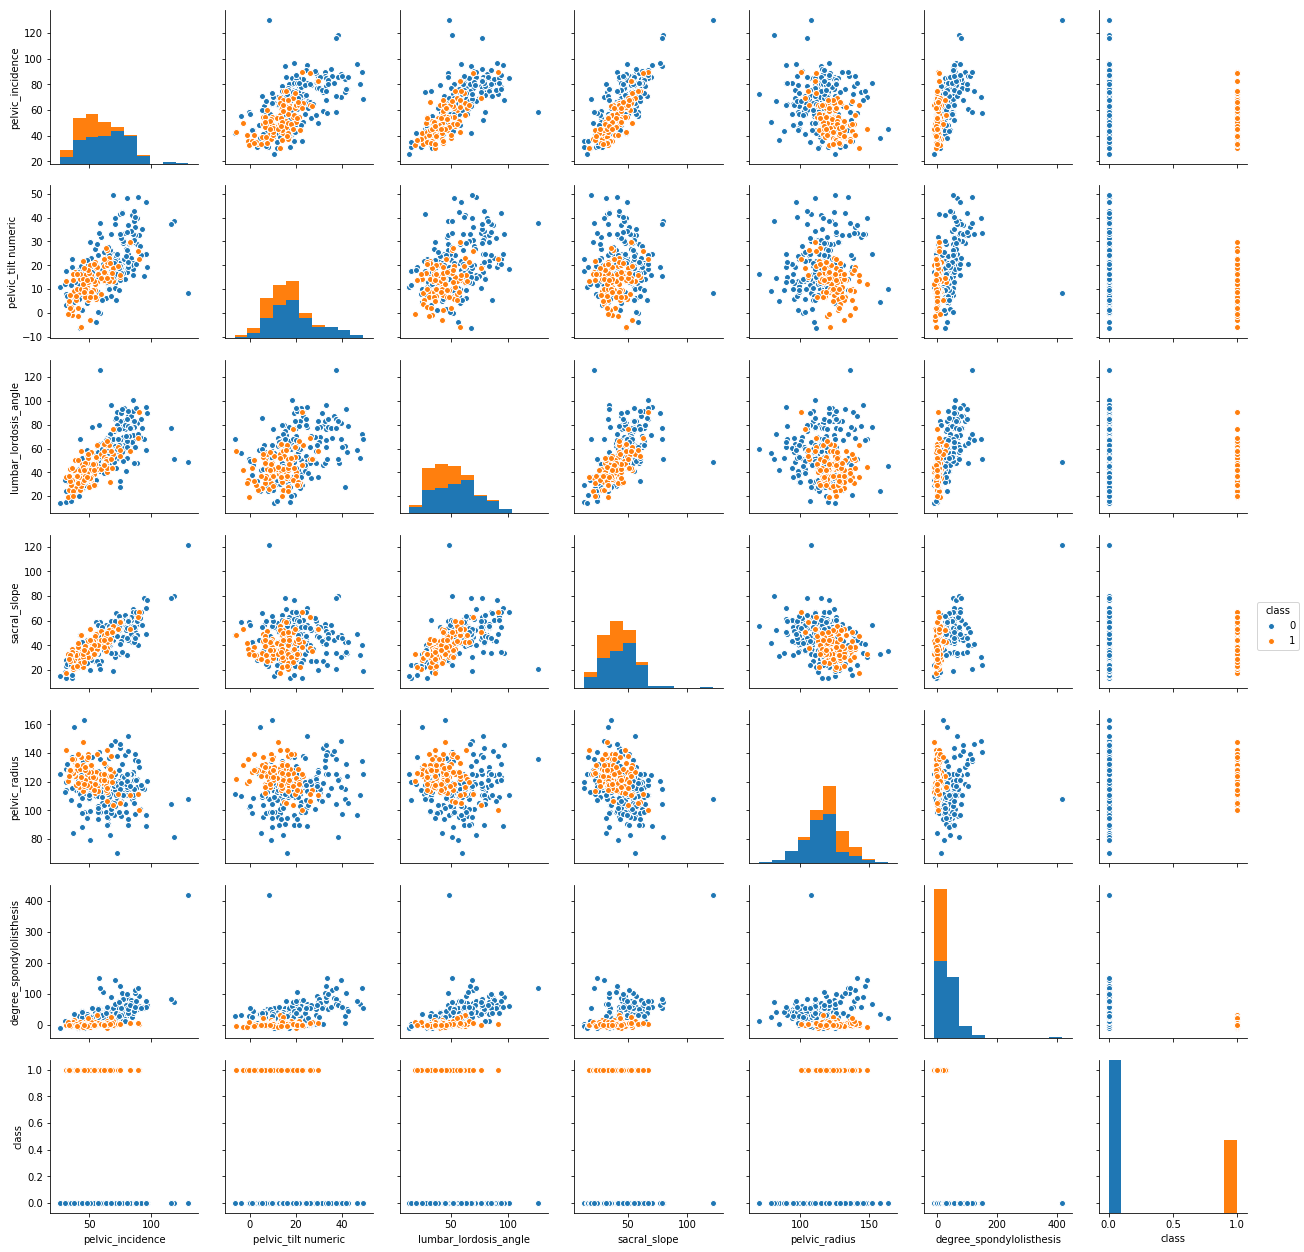

In [51]:
sns.pairplot(df,hue='class')

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [52]:
X = df[numeric_cols]
X.shape

(310, 6)

In [53]:
Y = df['class']
Y.shape

(310,)

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
dtypes: float64(6)
memory usage: 14.6 KB


# Normalize your Data (X) to get values between 0 to 1.

In [56]:
X = minmax_scale(X)

# Split the dat as train and test with a ratio of 70:30.

In [57]:
test_size = 0.30 # taking 70:30 training and test set
seed = 8  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [64]:
k=12
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [65]:
predicted_labels = knn.predict(X_test)
knn.score(X_test, y_test)

0.7903225806451613

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [66]:
#Compute accuracy on the training set
train_accuracy = knn.score(X_train,y_train)
    
#Compute accuracy on the testing set
test_accuracy = knn.score(X_test, y_test)

In [67]:
print("Performance score of train and test are =", train_accuracy, test_accuracy)

Performance score of train and test are = 0.8387096774193549 0.7903225806451613


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

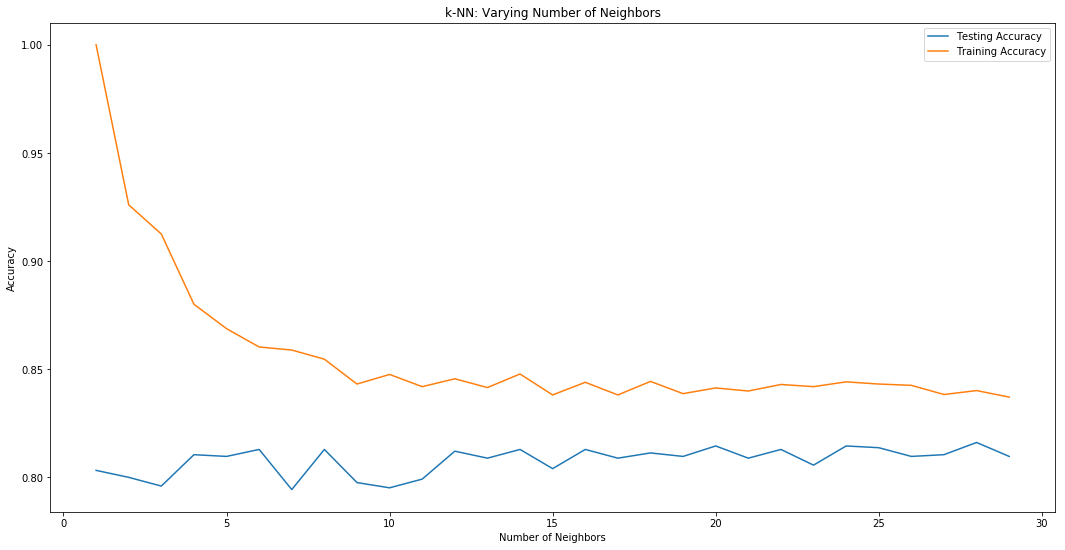

In [68]:
neighbors = np.arange(1, 30)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
random_state=np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train.values.ravel())
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    random_state[i]=j
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
        
# creating odd list of K for KNN
myList = list(range(1,100))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 16


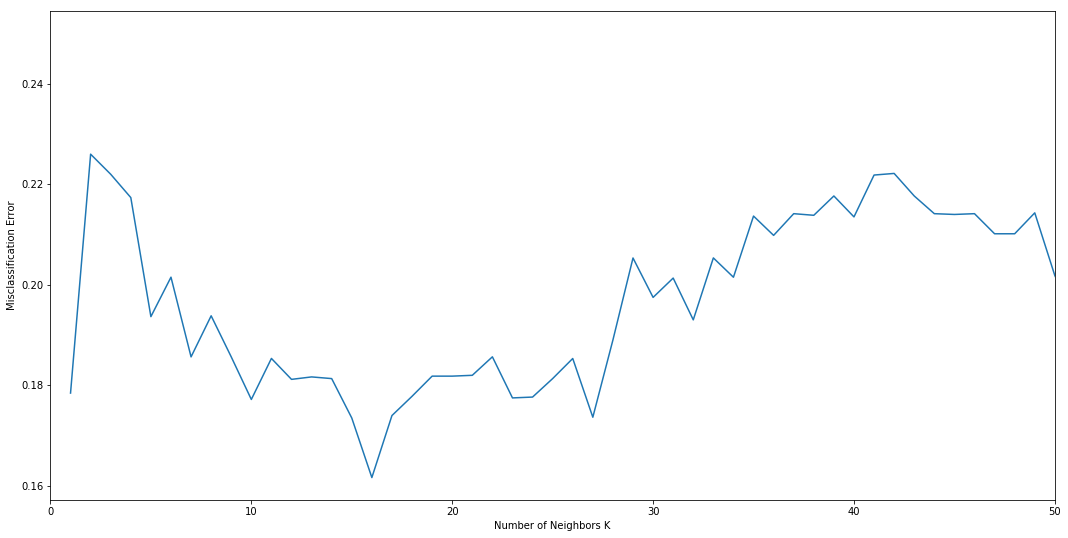

In [73]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### ANSWER: Best and optimum K value for the data is 16

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [74]:
###read the data in pandas FROM A CSV
df = pd.read_csv("3Classdata.csv")

# Explore the data set.Get necessary information about the data.

#### Shape of the Data

In [75]:
df.shape

(310, 7)

#### Data type of each attribute

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [77]:
# Storing numeric columns into variables for classification
numeric_cols = df.select_dtypes(include=[np.number]).columns

#### Head and Tail of dataset

In [78]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [79]:
df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


#### Checking the presence of missing values

In [80]:
if df.isnull().values.any() == False:
    print("There are no nulls/NaN values in our data frame")

There are no nulls/NaN values in our data frame


#### 5  point summary

In [81]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


# Encode the Class variable to integer.

In [82]:
df['class'] = pd.Categorical(df['class']).codes

In [83]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
df.groupby(["class"]).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
0,60,60,60,60,60,60
1,100,100,100,100,100,100
2,150,150,150,150,150,150


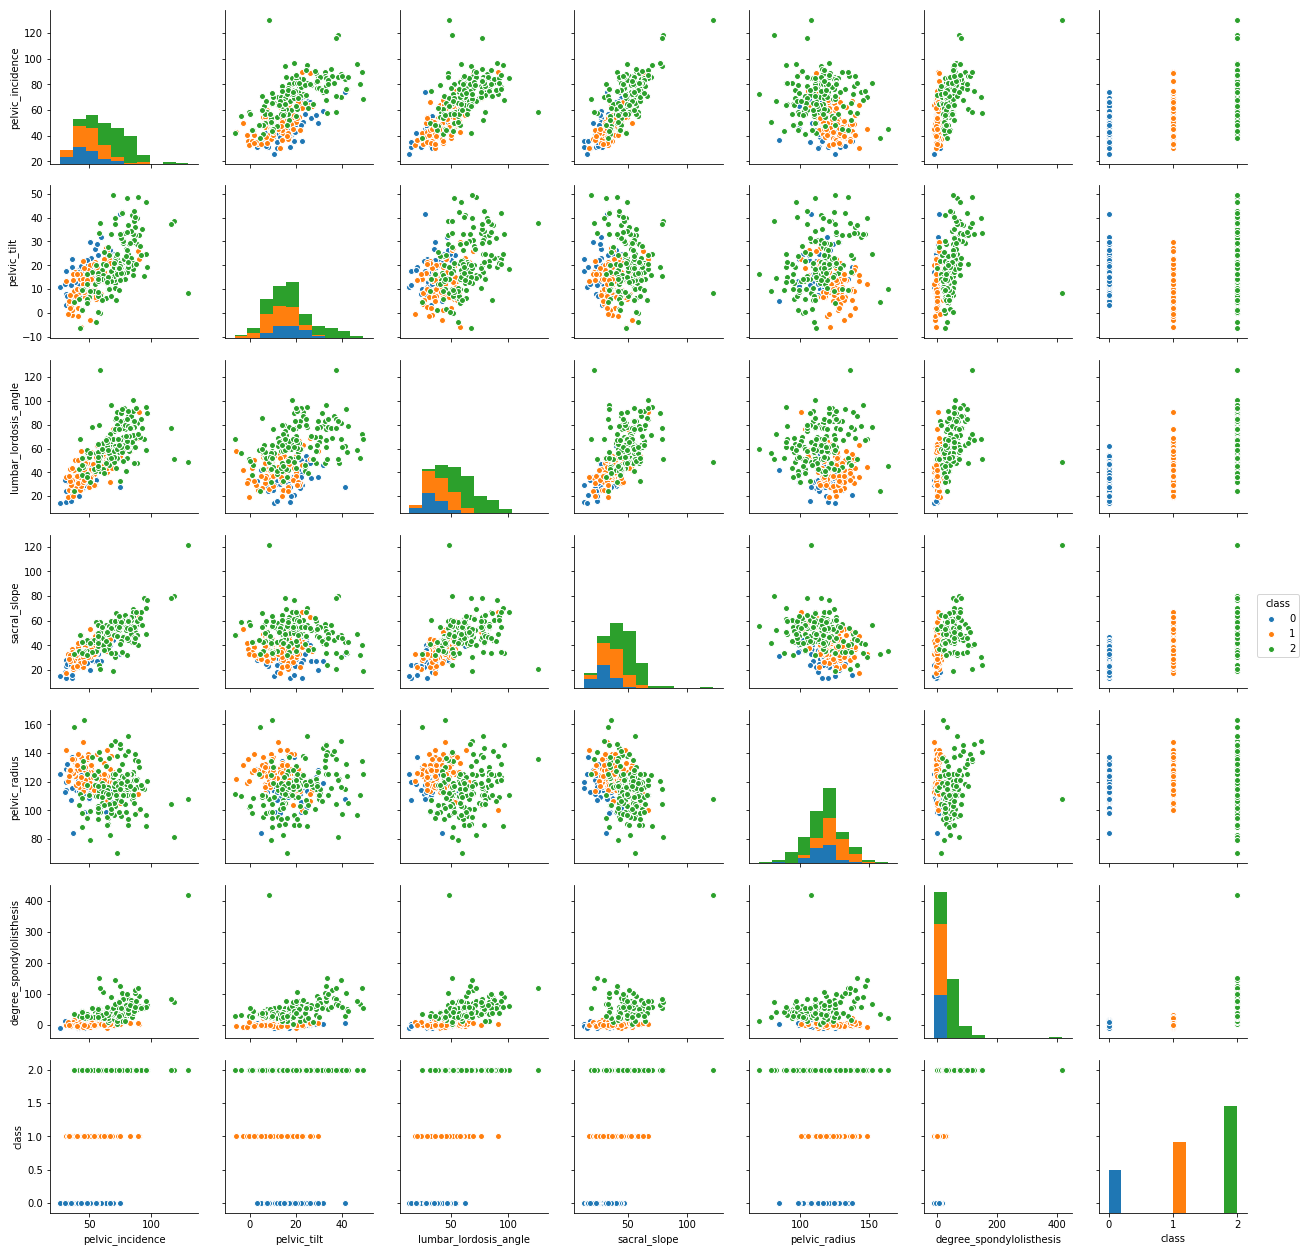

In [84]:
sns.pairplot(df,hue='class')

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [85]:
x = np.array(df[numeric_cols])
x.shape
X = pd.DataFrame(x)

In [86]:
y = np.array(df[PredictColumn])
y.shape
Y=pd.DataFrame(y)

# Normalize your Data (X) to get values between 0 to 1.

In [87]:
X = minmax_scale(X)

# Split the dat as train and test with a ratio of 70:30.

In [88]:
test_size = 0.30 # taking 70:30 training and test set
seed = 8  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [89]:
k=8
knn = KNeighborsClassifier(n_neighbors=k)

In [90]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [91]:
predicted_labels = knn.predict(X_test)
knn.score(X_test, y_test)

0.7634408602150538

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [92]:
#Compute accuracy on the training set
train_accuracy = knn.score(X_train,y_train)
    
#Compute accuracy on the testing set
test_accuracy = knn.score(X_test, y_test)

In [93]:
print("Performance score of train and test are =", train_accuracy, test_accuracy)

Performance score of train and test are = 0.8110599078341014 0.7634408602150538


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

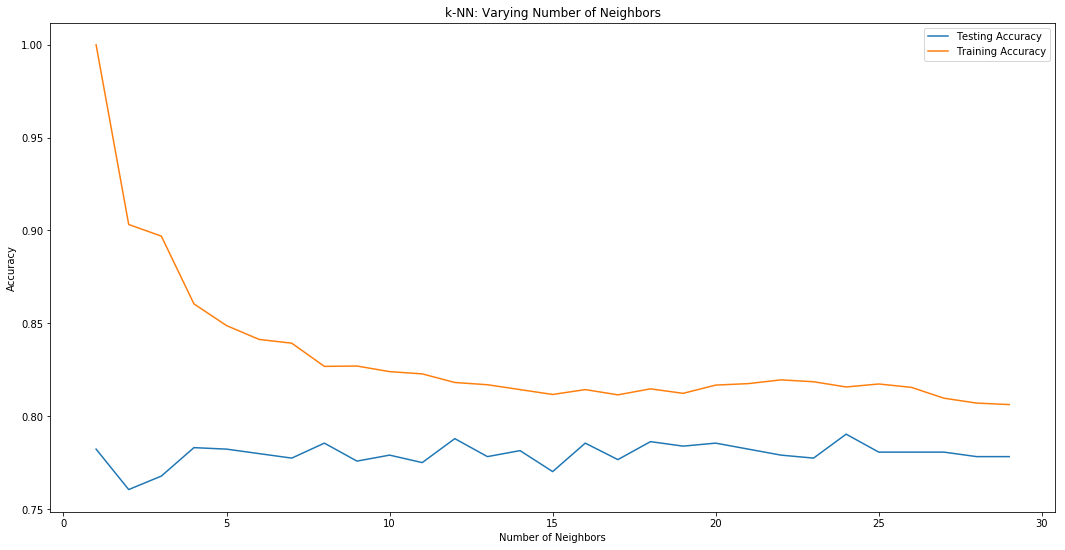

In [94]:
neighbors = np.arange(1, 30)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
random_state=np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train.values.ravel())
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    random_state[i]=j
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
        
# creating odd list of K for KNN
myList = list(range(1,100))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 11


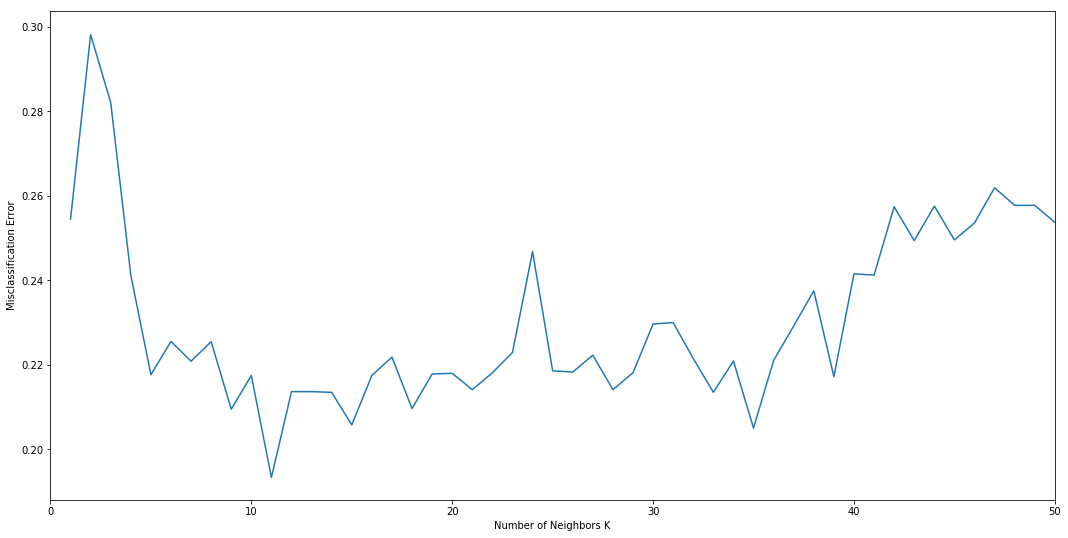

In [96]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### ANSWER: Best and optimum K value for the data is 11